In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [63]:
credit = pd.read_csv("E:\\pooja\\DS\\ExcelR\\R\\Assignments\\creditcard.csv", index_col=0)

In [47]:
credit.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


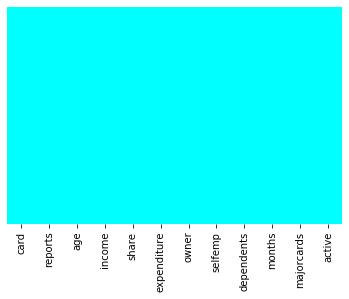

In [19]:
sns.heatmap(credit.isnull(),cbar=False, yticklabels=False, cmap="cool")

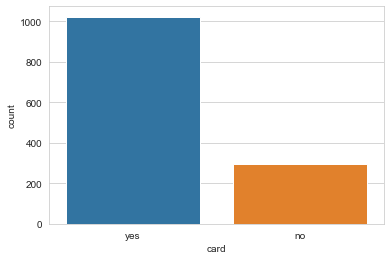

In [21]:
sns.set_style("whitegrid")
sns.countplot(x="card", data=credit)

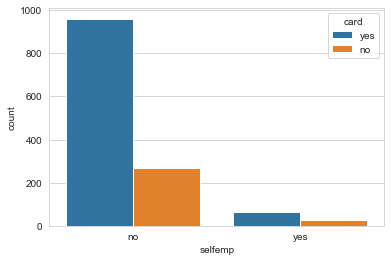

In [22]:
sns.countplot(x="selfemp", data=credit, hue="card")

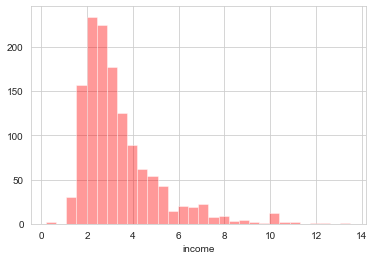

In [24]:
sns.distplot(credit['income'],kde=False, bins=30, color="red")

In [57]:
owner = pd.get_dummies(credit['owner'], drop_first= True)
selfemp = pd.get_dummies(credit['selfemp'], drop_first=True)

In [58]:
credit.drop(['owner','selfemp'], axis=1, inplace=True)

In [60]:
credit = pd.concat([owner,selfemp], axis=1)

In [65]:
def card(cols):
    card = cols[0]
    
    if card == "yes":
        return 1
    else:
        return 0

In [66]:
def owner(cols):
    owner = cols[0]
    
    if owner == "yes":
        return 1
    else:
        return 0

In [67]:
def selfemp(cols):
    selfemp = cols[0]
    
    if selfemp == "yes":
        return 1
    else:
        return 0

In [69]:
credit['card'] = credit[['card']].apply(card, axis=1)
credit['owner'] = credit[['owner']].apply(owner, axis=1)
credit['selfemp'] = credit[['selfemp']].apply(selfemp, axis=1)

In [70]:
credit.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
2,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
3,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
4,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
5,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


In [71]:
credit['owner'].unique()

array([1, 0], dtype=int64)

In [73]:
from sklearn.preprocessing import StandardScaler


In [74]:
scale = StandardScaler()

In [82]:
credit[credit.columns[1:]]

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
2,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
3,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
4,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
5,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...
1315,0,33.58333,4.5660,0.002146,7.333333,1,0,0,94,1,19
1316,5,23.91667,3.1920,0.000376,0.000000,0,0,3,12,1,5
1317,0,40.58333,4.6000,0.026513,101.298300,1,0,2,1,1,2
1318,0,32.83333,3.7000,0.008999,26.996670,0,1,0,60,1,7


In [83]:
credit_scaled = scale.fit_transform(credit[credit.columns[1:]])

In [84]:
credit_scaled = pd.DataFrame(credit_scaled, columns=['reports','age','income','share','expenditure',
                                                    'owner','selfemp','dependents','months','majorcards','active'])

In [85]:
credit_scaled


,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,-0.339397,0.439254,0.681894,-0.374787,-0.220766,1.127042,-0.272221,1.608362,-0.019135,0.472824,0.793701
1,-0.339397,0.003639,-0.558317,-0.671269,-0.643854,-0.887278,-0.272221,1.608362,-0.321037,0.472824,0.952345
2,-0.339397,0.044735,0.670083,-0.682486,-0.624944,1.127042,-0.272221,2.410112,0.041245,0.472824,-0.316807
3,-0.339397,-0.267592,-0.487448,-0.037185,-0.173411,-0.887278,-0.272221,-0.796887,-0.456893,0.472824,0.000481
4,-0.339397,-0.103209,3.792286,-0.017772,1.328281,1.127042,-0.272221,0.806613,0.131816,0.472824,-0.316807
...,...,...,...,...,...,...,...,...,...,...,...
1314,-0.339397,0.036515,0.709061,-0.703721,-0.653118,1.127042,-0.272221,-0.796887,0.584669,0.472824,1.904209
1315,3.378746,-0.916904,-0.102392,-0.722431,-0.680068,-0.887278,-0.272221,1.608362,-0.653130,0.472824,-0.316807
1316,-0.339397,0.726923,0.729140,-0.446203,-0.307806,1.127042,-0.272221,0.806613,-0.819176,0.472824,-0.792739
1317,-0.339397,-0.037457,0.197621,-0.631298,-0.580857,-0.887278,3.673487,-0.796887,0.071436,0.472824,0.000481


In [86]:
credit_scaled['card'] = credit['card']

In [87]:
credit_scaled.head()

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,card
0,-0.339397,0.439254,0.681894,-0.374787,-0.220766,1.127042,-0.272221,1.608362,-0.019135,0.472824,0.793701,NaN
1,-0.339397,0.003639,-0.558317,-0.671269,-0.643854,-0.887278,-0.272221,1.608362,-0.321037,0.472824,0.952345,1.0
2,-0.339397,0.044735,0.670083,-0.682486,-0.624944,1.127042,-0.272221,2.410112,0.041245,0.472824,-0.316807,1.0
3,-0.339397,-0.267592,-0.487448,-0.037185,-0.173411,-0.887278,-0.272221,-0.796887,-0.456893,0.472824,0.000481,1.0
4,-0.339397,-0.103209,3.792286,-0.017772,1.328281,1.127042,-0.272221,0.806613,0.131816,0.472824,-0.316807,1.0


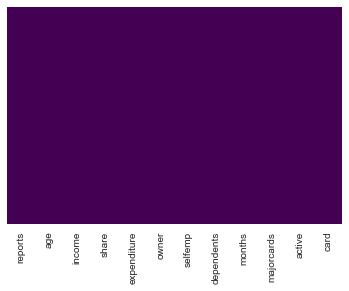

In [106]:
sns.heatmap(credit_scaled.isna(),cbar=False, yticklabels=False, cmap="viridis")

In [89]:
credit['card'].unique()

array([1, 0], dtype=int64)

In [107]:
credit_scaled.dropna(inplace=True)

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [112]:
credit_scaled.head()

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,card
1,-0.339397,0.003639,-0.558317,-0.671269,-0.643854,-0.887278,-0.272221,1.608362,-0.321037,0.472824,0.952345,1.0
2,-0.339397,0.044735,0.670083,-0.682486,-0.624944,1.127042,-0.272221,2.410112,0.041245,0.472824,-0.316807,1.0
3,-0.339397,-0.267592,-0.487448,-0.037185,-0.173411,-0.887278,-0.272221,-0.796887,-0.456893,0.472824,0.000481,1.0
4,-0.339397,-0.103209,3.792286,-0.017772,1.328281,1.127042,-0.272221,0.806613,0.131816,0.472824,-0.316807,1.0
5,-0.339397,-0.982658,-0.511071,-0.256752,-0.341988,-0.887278,-0.272221,-0.796887,-0.019135,0.472824,-0.951383,1.0


In [115]:
X = credit_scaled.drop("card", axis =1)
y = credit_scaled['card']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [118]:
logmodel = LogisticRegression()


In [127]:
logmodel.fit(X_train, y_train)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
card_predictions = logmodel.predict(X_test)

In [121]:
from sklearn.metrics import confusion_matrix, classification_report

In [130]:
print(confusion_matrix(y_test, card_predictions))

[[  0  97]
 [  0 338]]


In [131]:
print(classification_report(y_test, card_predictions))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        97
         1.0       0.78      1.00      0.87       338

    accuracy                           0.78       435
   macro avg       0.39      0.50      0.44       435
weighted avg       0.60      0.78      0.68       435



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [129]:
card_predictions


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.